# 1.	Knapsack Problem

## Algorithm

In [ ]:
def DPKnapsack(w, v, W):
  '''
    Function to solve Knapsack Problem using Dynamic Programming
    Input:
      w: list of weights
      v: list of values
      W: maximum weight
    Output:
      Maximum value that can be obtained
  '''
  n = len(w)
  F = [[0] * (W + 1) for _ in range(n + 1)]
  for i in range(1, n + 1):
    for j in range(1, W + 1):
      if w[i - 1] <= j:
        F[i][j] = max(F[i - 1][j], v[i - 1] + F[i - 1][j - w[i - 1]])
      else:
        F[i][j] = F[i - 1][j]
  return F[n][W]

# Ví dụ sử dụng:
weights = [2, 3, 4, 5]
values = [3, 4, 5, 6]
capacity = 5

result = DPKnapsack(weights, values, capacity)
print("Giá trị tối đa có thể đạt được:", result)


Giá trị tối đa có thể đạt được: 7


## Analysis

1. Input size: n (the number of items) and W (the capacity of the knapsack) => T(n,W)
2. Basic operation: Comparision on line 5
3. Worse case: No
4. $T(n,W) = W + W + ... + W = W*n$

So, T(n,W) $∈Θ(n*W)$

# 2.	Computing the transitive closure of a relation

## Algorithm

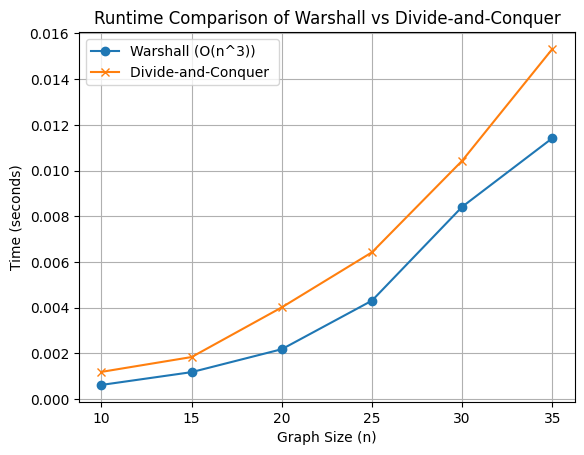

In [ ]:
import numpy as np
import time
import matplotlib.pyplot as plt

# Warshall's Algorithm for Transitive Closure
def warshall(A):
    """
    Computes the transitive closure of a graph using Warshall's algorithm.
    Input:
    A (ndarray): Adjacency matrix representing the directed graph
    Output:
    R (ndarray): Transitive closure matrix
    """
    n = len(A)
    R = np.copy(A)
    for k in range(n):
        for i in range(n):
            for j in range(n):
                R[i, j] = R[i, j] or (R[i, k] and R[k, j])
    return R

# Divide and Conquer for Transitive Closure
def devide_and_conquer(W):
    n = len(W)
    if n <= 1:
        return W
    mid = n // 2
    a = [row[:mid] for row in W[:mid]]
    b = [row[mid:] for row in W[:mid]]
    c = [row[:mid] for row in W[mid:]]
    d = [row[mid:] for row in W[mid:]]

    a_closure = devide_and_conquer(a)
    b_closure = devide_and_conquer(b)
    c_closure = devide_and_conquer(c)
    d_closure = devide_and_conquer(d)

    result = [[0] * n for _ in range(n)]
    for i in range(n):
        for j in range(n):
            if i < mid and j < mid:
                result[i][j] = a_closure[i][j]
            elif i < mid and j >= mid:
                if i < len(b_closure) and j - mid < len(b_closure[0]):
                    result[i][j] = b_closure[i][j - mid]
            elif i >= mid and j < mid:
                if i - mid < len(c_closure) and j < len(c_closure[0]):
                    result[i][j] = c_closure[i - mid][j]
            else:
                if i - mid < len(d_closure) and j - mid < len(d_closure[0]):
                    result[i][j] = d_closure[i - mid][j - mid]
    for k in range(n):
        for i in range(n):
            for j in range(n):
                result[i][j] = result[i][j] or (result[i][k] and result[k][j])

    return result

def generate_random_graph(n, p=0.5):
    return np.random.rand(n, n) < p

def measure_time_for_warshall(n):
    A = generate_random_graph(n)
    start_time = time.time()
    warshall(A)
    end_time = time.time()
    return end_time - start_time

def measure_time_for_divide_and_conquer(n):
    A = generate_random_graph(n)
    start_time = time.time()
    devide_and_conquer(A)
    end_time = time.time()
    return end_time - start_time

def plot_runtime_comparison():
    sizes = [10, 15, 20, 25, 30, 35]
    times_warshall = []
    times_dc = []

    for size in sizes:
        times_warshall.append(measure_time_for_warshall(size))
        times_dc.append(measure_time_for_divide_and_conquer(size))

    plt.plot(sizes, times_warshall, label="Warshall (O(n^3))", marker='o')
    plt.plot(sizes, times_dc, label="Divide-and-Conquer ", marker='x')
    plt.xlabel("Graph Size (n)")
    plt.ylabel("Time (seconds)")
    plt.title("Runtime Comparison of Warshall vs Divide-and-Conquer")
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage
if __name__ == "__main__":
    plot_runtime_comparison()


## Analysis

### Function: warshall(A)

1. Input size: n (Number of edges of the graph) => T(n)
2. Basic operation: expression on line 6
3. Worse case: No
4. T(n) = $n*n*n = $ $n^3$

So, T(n) $∈Θ(n^3)$

# 3.	All pairs shortest path distances.

## Algorithm

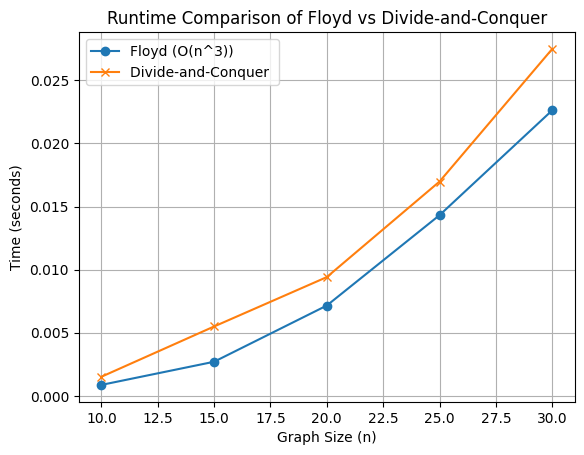

In [ ]:
import numpy as np
import time
import matplotlib.pyplot as plt

# Hàm Floyd-Warshall
def floyd(W):
    """
    Computes the all-pairs shortest paths using Floyd-Warshall algorithm.
    Input:
    W (ndarray): Weight matrix of the graph
    Output:
    D (ndarray): Distance matrix representing the shortest paths
    """
    n = len(W)
    D = np.copy(W)
    for k in range(n):
        for i in range(n):
            for j in range(n):
                D[i, j] = min(D[i, j], D[i, k] + D[k, j])
    return D

def devide_and_conquer(W):
    """Computes shortest paths using Divide and Conquer."""
    n = len(W)
    if n <= 1:
        return W

    mid = n // 2

    a = [row[:mid] for row in W[:mid]]
    b = [row[mid:] for row in W[:mid]]
    c = [row[:mid] for row in W[mid:]]
    d = [row[mid:] for row in W[mid:]]

    a_shortest = devide_and_conquer(a)
    b_shortest = devide_and_conquer(b)
    c_shortest = devide_and_conquer(c)
    d_shortest = devide_and_conquer(d)

    result = [[float('inf')] * n for _ in range(n)]
    for i in range(n):
        for j in range(n):
            if i < mid and j < mid:
                result[i][j] = a_shortest[i][j]
            elif i < mid and j >= mid:
                if i < len(b_shortest) and j - mid < len(b_shortest[0]):
                    result[i][j] = b_shortest[i][j - mid]
            elif i >= mid and j < mid:
                if i - mid < len(c_shortest) and j < len(c_shortest[0]):
                    result[i][j] = c_shortest[i - mid][j]
            else:
                if i - mid < len(d_shortest) and j - mid < len(d_shortest[0]):
                    result[i][j] = d_shortest[i - mid][j - mid]

    for k in range(n):
        for i in range(n):
            for j in range(n):
                result[i][j] = min(result[i][j], result[i][k] + result[k][j])

    return result

def generate_random_weight_matrix(n, p=0.5, max_weight=10):
    W = np.random.rand(n, n) < p
    W = np.multiply(W, np.random.randint(1, max_weight + 1, size=(n, n)))
    np.fill_diagonal(W, 0)
    return W

def measure_time_for_floyd(W):
    start_time = time.time()
    floyd(W)
    end_time = time.time()
    return end_time - start_time

def measure_time_for_divide_and_conquer(W):
    start_time = time.time()
    devide_and_conquer(W)
    end_time = time.time()
    return end_time - start_time

def plot_runtime_comparison():
    sizes = [10, 15, 20, 25, 30]
    times_fw = []
    times_dc = []

    for size in sizes:
        W = generate_random_weight_matrix(size)
        times_fw.append(measure_time_for_floyd(W))
        times_dc.append(measure_time_for_divide_and_conquer(W))
    plt.plot(sizes, times_fw, label="Floyd (O(n^3))", marker='o')
    plt.plot(sizes, times_dc, label="Divide-and-Conquer ", marker='x')
    plt.xlabel("Graph Size (n)")
    plt.ylabel("Time (seconds)")
    plt.title("Runtime Comparison of Floyd vs Divide-and-Conquer")
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage
if __name__ == "__main__":
    plot_runtime_comparison()


## Analysis

### Function: floyd(W)

1. Input size: n (Number of edges of the graph) => T(n)
2. Basic operation: expression on line 6
3. Worse case: No
4. T(n) = $n*n*n = $ $n^3$

So, T(n) $∈Θ(n^3)$